In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importing the dataset

In [88]:
application_record_dataset = pd.read_csv('data/application_record.csv')
credit_record_dataset = pd.read_csv('data/credit_record.csv').drop(labels=['MONTHS_BALANCE'],axis=1)

dataset = pd.merge(application_record_dataset, credit_record_dataset, on='ID').drop(labels=['ID'],axis=1)
dataset

dataset['NAME_FAMILY_STATUS'].value_counts()

Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: NAME_FAMILY_STATUS, dtype: int64

## Data Cleaning

In [89]:
# Drop Missing values
dataset = dataset.dropna(axis=1)
print(dataset.isnull().sum())
dataset

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,C
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,C
2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,C
3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,C
4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,0
777711,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,2
777712,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,1
777713,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,0


In [90]:
# Categorical Encoding
features = ['CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
            'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL']

encoder = preprocessing.LabelEncoder()

for col in features:
    dataset[col] = encoder.fit_transform(dataset[col])

dataset["STATUS"] = dataset['STATUS'].map(
    {'C': 1, 'X': 1, '0': 1, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0}).astype(int)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          777715 non-null  int32  
 1   FLAG_OWN_CAR         777715 non-null  int32  
 2   FLAG_OWN_REALTY      777715 non-null  int32  
 3   CNT_CHILDREN         777715 non-null  int64  
 4   AMT_INCOME_TOTAL     777715 non-null  float64
 5   NAME_INCOME_TYPE     777715 non-null  int32  
 6   NAME_EDUCATION_TYPE  777715 non-null  int32  
 7   NAME_FAMILY_STATUS   777715 non-null  int32  
 8   NAME_HOUSING_TYPE    777715 non-null  int32  
 9   DAYS_BIRTH           777715 non-null  int64  
 10  DAYS_EMPLOYED        777715 non-null  int64  
 11  FLAG_MOBIL           777715 non-null  int64  
 12  FLAG_WORK_PHONE      777715 non-null  int64  
 13  FLAG_PHONE           777715 non-null  int64  
 14  FLAG_EMAIL           777715 non-null  int64  
 15  CNT_FAM_MEMBERS  

In [91]:
dataset['NAME_FAMILY_STATUS'].value_counts()

# Married                 546619    1
# Single / not married     94335    3
# Civil marriage           60342    0
# Separated                45255    2
# Widow                    31164    4

1    546619
3     94335
0     60342
2     45255
4     31164
Name: NAME_FAMILY_STATUS, dtype: int64

## Handle Imbalanced data

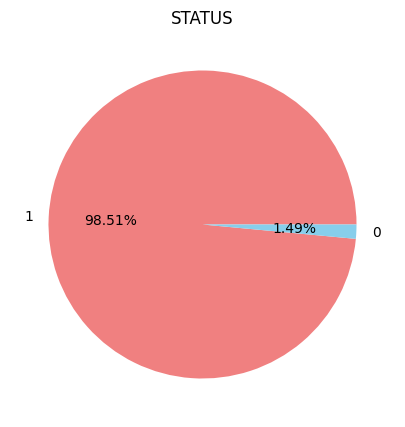

In [92]:
import matplotlib.pyplot as plt

plt.figure( figsize=(10,5) )
dataset['STATUS'].value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'STATUS' )
plt.ylabel( '' )
plt.show()

In [93]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# over sampling and under sampling
X_smote, y_smote = SMOTETomek(random_state=1).fit_resample(X, y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, train_size=0.25, random_state=0)

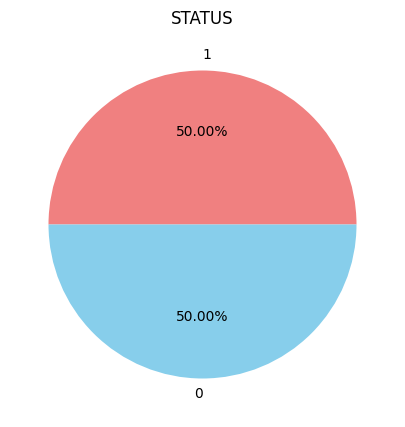

In [94]:
plt.figure( figsize=(10,5) )
pd.Series(y_smote).value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'STATUS' )  # 圖標題
plt.ylabel( '' )
plt.show()

## Feature Scaling

In [95]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the model

- ### K nearest neighbors

In [96]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

y_knn_pred = knn_classifier.predict(X_test)

- ### XGboost

In [97]:
xgb_classifier = XGBClassifier(max_depth=12,n_estimators=250,min_child_weight=8, subsample=0.8, learning_rate =0.02,random_state=0)
xgb_classifier.fit(X_train, y_train)

y_xgb_pred = xgb_classifier.predict(X_test)

- ### Random Forest

In [98]:
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

y_rf_pred = rf_classifier.predict(X_test)

- ### Naive Bayes

In [99]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_nb_pred = nb_classifier.predict(X_test)

- ### Logistic Regression

In [101]:
logis_classifier = LogisticRegression(random_state=0)
logis_classifier.fit(X_train, y_train)

y_logis_pred = logis_classifier.predict(X_test)

feature_coef = pd.DataFrame(zip(dataset.drop(labels=['STATUS'],axis=1).columns, np.transpose(logis_classifier.coef_)), columns=['features', 'coef'])
feature_coef

,features,coef
0,CODE_GENDER,[-0.12812782685481913]
1,FLAG_OWN_CAR,[0.09045610687779877]
2,FLAG_OWN_REALTY,[0.06457114149884181]
3,CNT_CHILDREN,[0.11744539485233205]
4,AMT_INCOME_TOTAL,[-0.02273901802487682]
5,NAME_INCOME_TYPE,[0.11502732199661583]
6,NAME_EDUCATION_TYPE,[0.010495767845879809]
7,NAME_FAMILY_STATUS,[-0.132308536466592]
8,NAME_HOUSING_TYPE,[0.014305627058625054]
9,DAYS_BIRTH,[-0.10826768220153975]


## Making the Confusion Matrix / Accuracy

In [102]:
print("=============== K nearest neighbors ===============")
print(confusion_matrix(y_test, y_knn_pred))
print("Accuracy of the knn model is %.4f" % accuracy_score(y_test, y_knn_pred))
print("Recall of the knn model is %.4f" % recall_score(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

=============== K nearest neighbors ===============
[[526716  47615]
 [ 73109 501770]]
Accuracy of the knn model is 0.8950
Recall of the knn model is 0.8728
              precision    recall  f1-score   support

           0       0.88      0.92      0.90    574331
           1       0.91      0.87      0.89    574879

    accuracy                           0.89   1149210
   macro avg       0.90      0.89      0.89   1149210
weighted avg       0.90      0.89      0.89   1149210



In [103]:
print("===================== XGboost =====================")
print(confusion_matrix(y_test, y_xgb_pred))
print("Accuracy of the XGboost model is %.4f" % accuracy_score(y_test, y_xgb_pred))
print("Recall of the XGboost model is %.4f" % recall_score(y_test, y_xgb_pred))
print(classification_report(y_test, y_xgb_pred))

===================== XGboost =====================
[[523168  51163]
 [ 61752 513127]]
Accuracy of the XGboost model is 0.9017
Recall of the XGboost model is 0.8926
              precision    recall  f1-score   support

           0       0.89      0.91      0.90    574331
           1       0.91      0.89      0.90    574879

    accuracy                           0.90   1149210
   macro avg       0.90      0.90      0.90   1149210
weighted avg       0.90      0.90      0.90   1149210



In [104]:
print("================== Random Forest ==================")
print(confusion_matrix(y_test, y_rf_pred))
print("Accuracy of the Random Forest model is %.4f" % accuracy_score(y_test, y_rf_pred))
print("Recall of the Random Forest model is %.4f" % recall_score(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))

================== Random Forest ==================
[[546672  27659]
 [ 73776 501103]]
Accuracy of the Random Forest model is 0.9117
Recall of the Random Forest model is 0.8717
              precision    recall  f1-score   support

           0       0.88      0.95      0.92    574331
           1       0.95      0.87      0.91    574879

    accuracy                           0.91   1149210
   macro avg       0.91      0.91      0.91   1149210
weighted avg       0.91      0.91      0.91   1149210



In [105]:
print("==================== Naive Bayes ====================")
print(confusion_matrix(y_test, y_nb_pred))
print("Accuracy of the Naive Bayes model is %.4f" % accuracy_score(y_test, y_nb_pred))
print("Recall of the Naive Bayes model is %.4f" % recall_score(y_test, y_nb_pred))
print(classification_report(y_test, y_nb_pred))

==================== Naive Bayes ====================
[[254438 319893]
 [221280 353599]]
Accuracy of the Naive Bayes model is 0.5291
Recall of the Naive Bayes model is 0.6151
              precision    recall  f1-score   support

           0       0.53      0.44      0.48    574331
           1       0.53      0.62      0.57    574879

    accuracy                           0.53   1149210
   macro avg       0.53      0.53      0.53   1149210
weighted avg       0.53      0.53      0.53   1149210



In [107]:
print("=================== Logistic Regression ===================")
print(confusion_matrix(y_test, y_logis_pred))
print("Accuracy of the Logistic Regression model is %.4f" % accuracy_score(y_test, y_logis_pred))
print("Recall of the Logistic Regression model is %.4f" % recall_score(y_test, y_logis_pred))
print(classification_report(y_test, y_logis_pred))

=================== Logistic Regression ===================
[[306480 267851]
 [244906 329973]]
Accuracy of the Logistic Regression model is 0.5538
Recall of the Logistic Regression model is 0.5740
              precision    recall  f1-score   support

           0       0.56      0.53      0.54    574331
           1       0.55      0.57      0.56    574879

    accuracy                           0.55   1149210
   macro avg       0.55      0.55      0.55   1149210
weighted avg       0.55      0.55      0.55   1149210



## Feature scores

In [108]:
feature_scores = pd.Series(rf_classifier.feature_importances_,
                           index=dataset.iloc[:, :-1].columns).sort_values(ascending=False)

print(feature_scores)

DAYS_BIRTH             0.226697
DAYS_EMPLOYED          0.170910
AMT_INCOME_TOTAL       0.152565
NAME_FAMILY_STATUS     0.049352
FLAG_OWN_REALTY        0.045386
NAME_EDUCATION_TYPE    0.045248
CNT_FAM_MEMBERS        0.044574
NAME_INCOME_TYPE       0.044387
CODE_GENDER            0.041292
FLAG_OWN_CAR           0.039932
FLAG_PHONE             0.037347
CNT_CHILDREN           0.031073
FLAG_WORK_PHONE        0.028085
NAME_HOUSING_TYPE      0.024837
FLAG_EMAIL             0.018315
FLAG_MOBIL             0.000000
dtype: float64


## ROC curve

In [109]:
# logistic define metrics
y_pred_logistic_proba = logis_classifier.predict_proba(X_test)[::, 1]
logistic_fpr, logistic_tpr, _ = metrics.roc_curve(
    y_test,  y_pred_logistic_proba)
logistic_auc = metrics.roc_auc_score(y_test, y_pred_logistic_proba)

# NB define metrics
y_pred_nb_proba = nb_classifier.predict_proba(X_test)[::, 1]
nb_fpr, nb_tpr, _ = metrics.roc_curve(
    y_test,  y_pred_nb_proba)
nb_auc = metrics.roc_auc_score(y_test, y_pred_nb_proba)

# xgboost define metrics
y_pred_xgb_proba = xgb_classifier.predict_proba(X_test)[::, 1]
xgb_fpr, xgb_tpr, _ = metrics.roc_curve(
    y_test,  y_pred_xgb_proba)
xgb_auc = metrics.roc_auc_score(y_test, y_pred_xgb_proba)

# KNN define metrics
y_pred_knn_proba = knn_classifier.predict_proba(X_test)[::, 1]
knn_fpr, knn_tpr, _ = metrics.roc_curve(
    y_test,  y_pred_knn_proba)
knn_auc = metrics.roc_auc_score(y_test, y_pred_knn_proba)

# Random Forest define metrics
y_pred_rf_proba = rf_classifier.predict_proba(X_test)[::, 1]
rf_fpr, rf_tpr, _ = metrics.roc_curve(
    y_test,  y_pred_rf_proba)
rf_auc = metrics.roc_auc_score(y_test, y_pred_rf_proba)

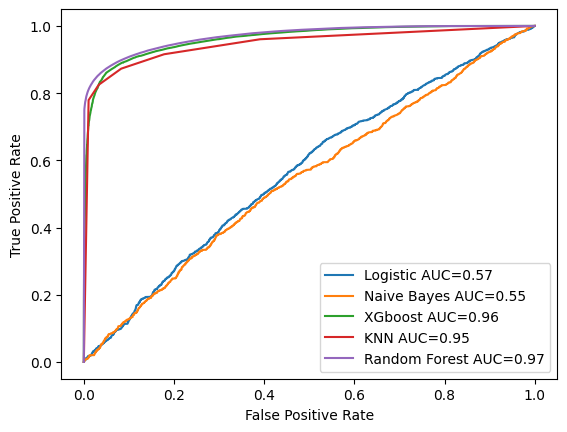

In [110]:
# create ROC curve
plt.plot(logistic_fpr, logistic_tpr,
         label="Logistic AUC=" + str(round(logistic_auc, 2)))
plt.plot(nb_fpr, nb_tpr, label="Naive Bayes AUC=" + str(round(nb_auc, 2)))
plt.plot(xgb_fpr, xgb_tpr, label="XGboost AUC=" + str(round(xgb_auc, 2)))
plt.plot(knn_fpr, knn_tpr, label="KNN AUC=" + str(round(knn_auc, 2)))
plt.plot(rf_fpr, rf_tpr, label="Random Forest AUC=" + str(round(rf_auc, 2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()